In [2]:
using Random
using Distributions
using StatsBase
using CairoMakie
using DataFrames
using DataInterpolations

In [28]:
# Función para la generación de los datos con una distribución normal
function gen_normal_data(mean::Union{Int64,Float64}, sd::Float64, n::Int64, bns::Int64)
    # Random.seed!(2)
    numbers = Vector{Int64}(undef, 0)
    bin_edges_1 = Vector{Float64}(undef, 0)
    bin_mid = Vector{Float64}(undef, 0)
    bin_edges_2 = Vector{Float64}(undef, 0)

    data = rand(Normal(mean, sd), n)
    bins = collect(LinRange(minimum(data), maximum(data), bns+1))
    bw = (bins[2] - bins[1])/2
    h = fit(Histogram, data, bins)
    
    for (i, j) in enumerate(1:bns)
        push!(numbers, i)
        push!(bin_edges_1, bins[j])
        push!(bin_mid, bins[j] + bw)
        push!(bin_edges_2, bins[j+1])
    end

    frec = collect(h.weights)
    frec_acum = cumsum(frec)/n
    df = DataFrame(n_bins=numbers, bin_edges_1=bin_edges_1, bin_mid=bin_mid, 
                        bin_edges_2=bin_edges_2, frec=h.weights, frec_acum=frec_acum)

    df[!, [2, 3, 4, 6]] = round.(df[!, [2, 3, 4, 6]], digits=3)

    return data, bin_mid, df
end

gen_normal_data (generic function with 1 method)

In [4]:
function plot_freq(rv::Vector{Float64},bin_avg::Vector{Float64},bns::Int64,variable::String,units::String,color::String)    
    set_theme!(; CairoMakie=(; px_per_unit=2), fontsize=17.5)
    f = Figure(size = (1300, 600))

    # Cumulative frequency
    bins = collect(LinRange(minimum(rv), maximum(rv), bns+1))
    bw = (bins[2] - bins[1])/2
    h = fit(Histogram, rv, bins)
    frec = collect(h.weights)
    frec_acum = cumsum(frec)/length(rv)

    # Graph-1
    ax1 = Axis(f[1, 1], xlabel = "bins", xlabelfont=:bold, 
              ylabel = "Frecuencia", ylabelfont=:bold)
    hist!(ax1, rv, bins=bin_avg, strokewidth=:1.25, strokecolor=:black, color=color)
    ax1.xgridvisible = false
    ax1.ygridvisible = false

    # Graph-2
    ax2 = Axis(f[1, 2], xlabel = variable * " " * "($units)", xlabelfont=:bold, 
              ylabel = "Frecuencia acumulada", ylabelfont=:bold)
    barplot!(ax2, bin_avg, frec_acum, strokecolor=:black, strokewidth=:1.25, color=color, gap=0.125)
    scatterlines!(ax2, bin_avg, frec_acum, color=:black, linestyle=:dashdot)
    ax2.xgridvisible = false
    ax2.ygridvisible = false

    # Title
    Label(f[0, :], uppercasefirst(variable), fontsize=20, font=:bold)
    f
end

plot_freq (generic function with 1 method)

## Porosity - $\phi$

In [29]:
poro, bin_mid_poro, df_poro = gen_normal_data(0.2, 0.03, 1000, 20) ;

In [31]:
first(df_poro, 10)

Row,n_bins,bin_edges_1,bin_mid,bin_edges_2,frec,frec_acum
,Int64,Float64,Float64,Float64,Int64,Float64
1,1,0.097,0.102,0.107,1,0.001
2,2,0.107,0.112,0.117,4,0.005
3,3,0.117,0.122,0.126,2,0.007
4,4,0.126,0.131,0.136,11,0.018
5,5,0.136,0.141,0.146,30,0.048
6,6,0.146,0.151,0.156,31,0.079
7,7,0.156,0.161,0.166,52,0.131
8,8,0.166,0.171,0.176,78,0.209
9,9,0.176,0.181,0.186,107,0.316


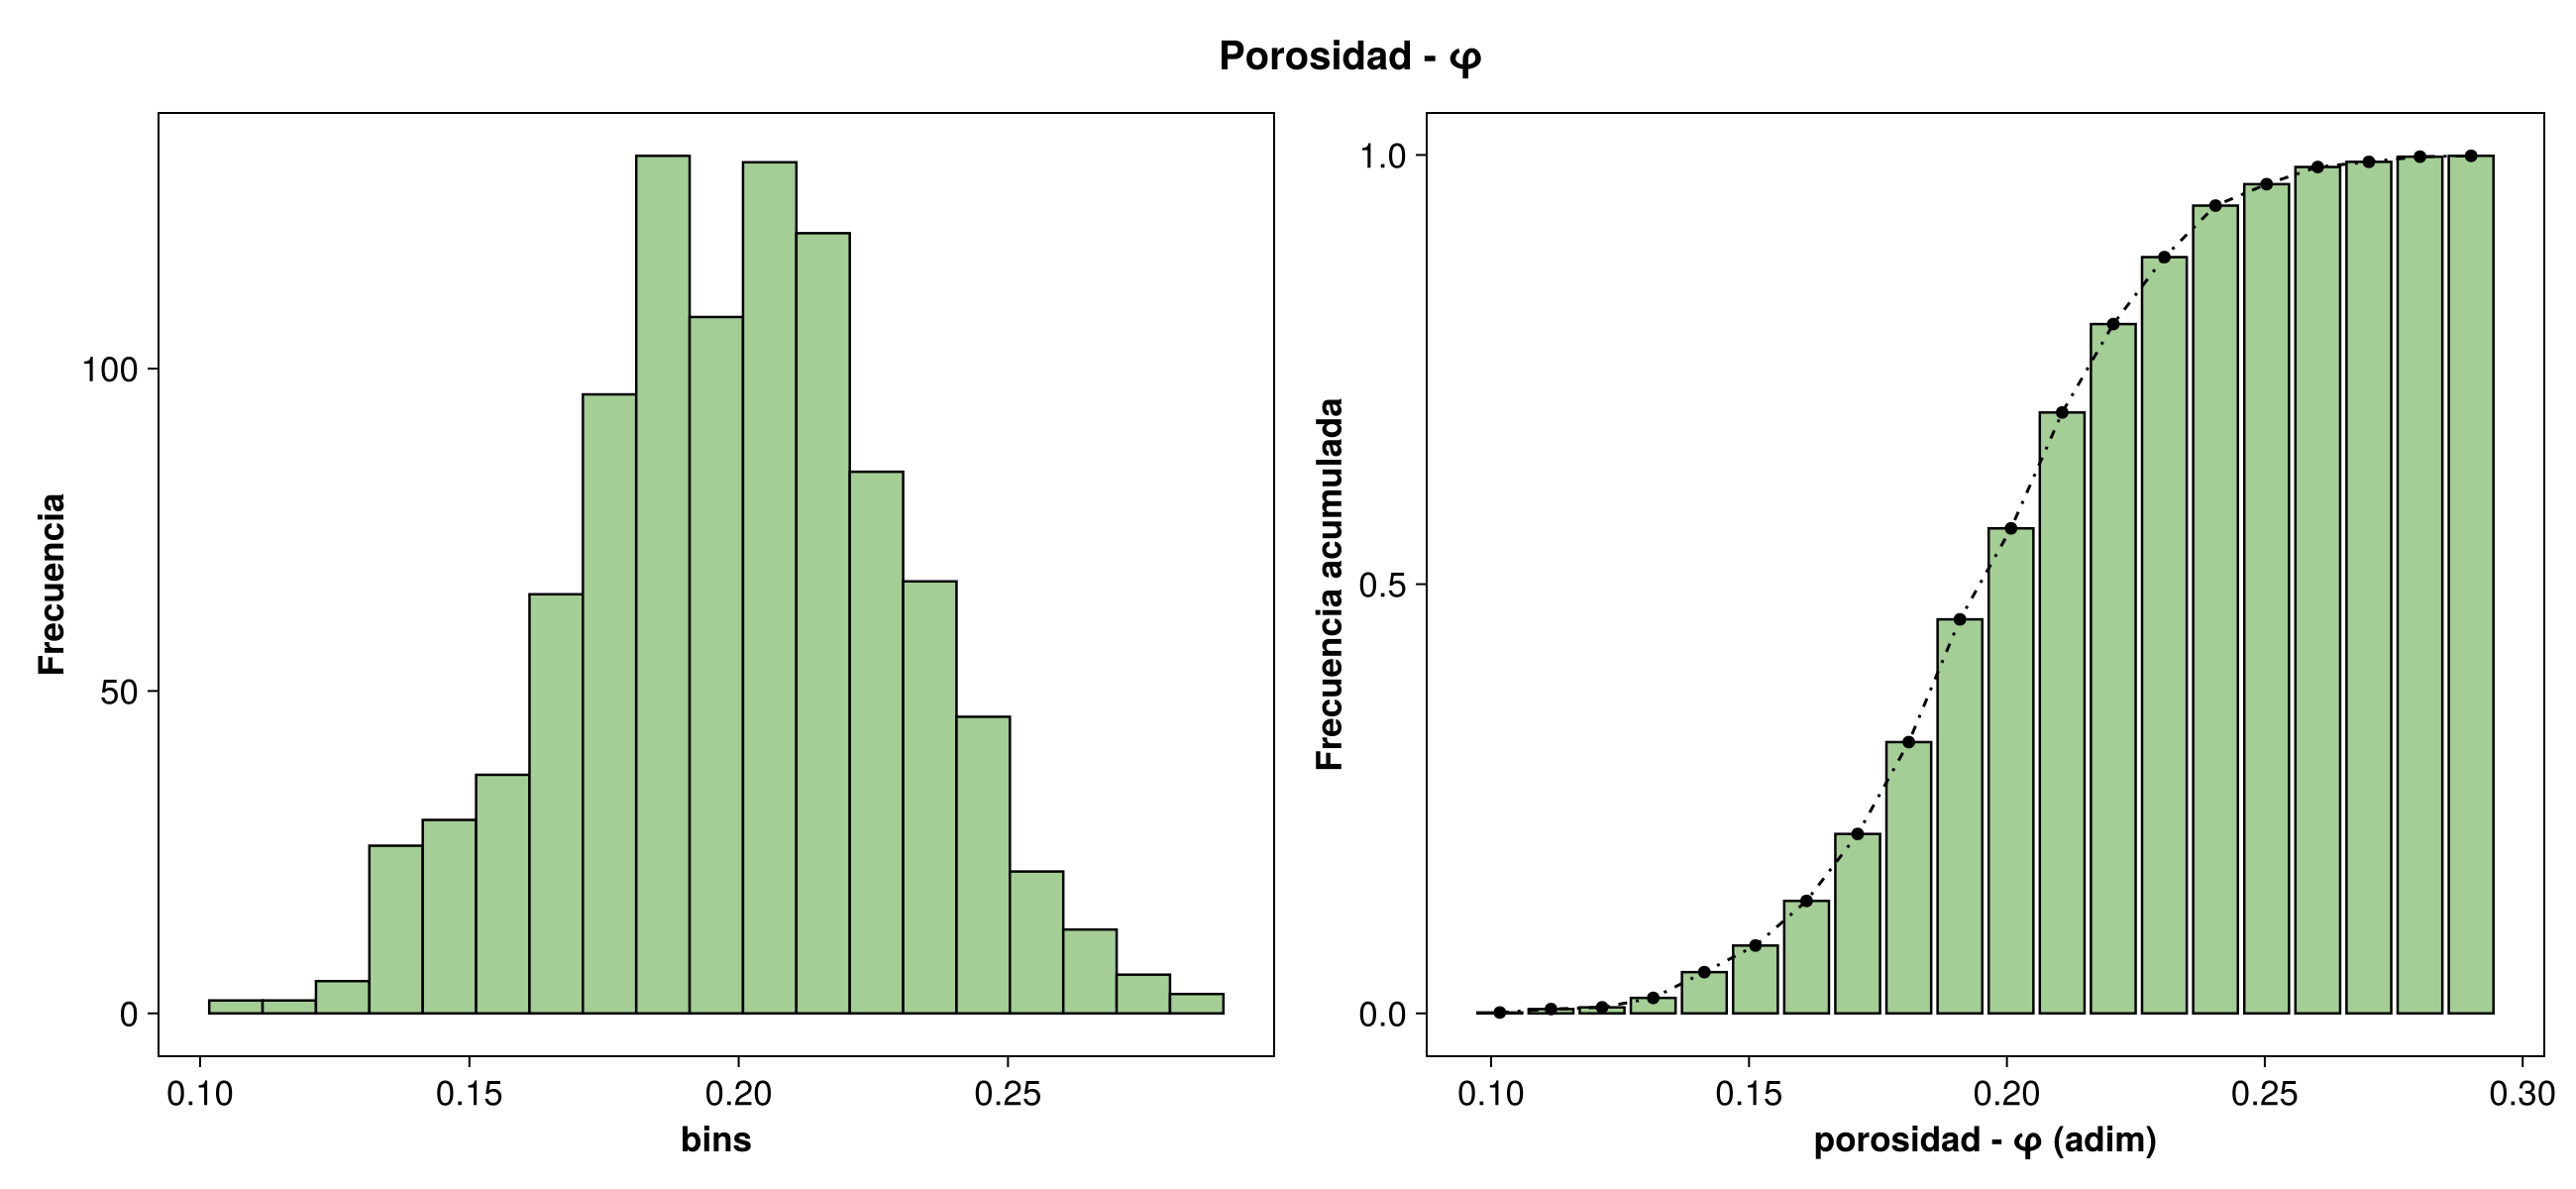

In [32]:
plot_freq(poro, bin_mid_poro, 20, "porosidad - φ", "adim", "#A4CE95")

## Water Saturation - Sw

In [37]:
sw, bin_mid_sw, df_sw = gen_normal_data(0.33, 0.03, 1000, 20);

In [38]:
first(df_sw, 10)

Row,n_bins,bin_edges_1,bin_mid,bin_edges_2,frec,frec_acum
,Int64,Float64,Float64,Float64,Int64,Float64
1,1,0.242,0.246,0.251,6,0.006
2,2,0.251,0.255,0.26,7,0.013
3,3,0.26,0.264,0.269,9,0.022
4,4,0.269,0.273,0.278,21,0.043
5,5,0.278,0.282,0.287,30,0.073
6,6,0.287,0.291,0.296,49,0.122
7,7,0.296,0.3,0.305,66,0.188
8,8,0.305,0.309,0.314,109,0.297
9,9,0.314,0.318,0.323,111,0.408


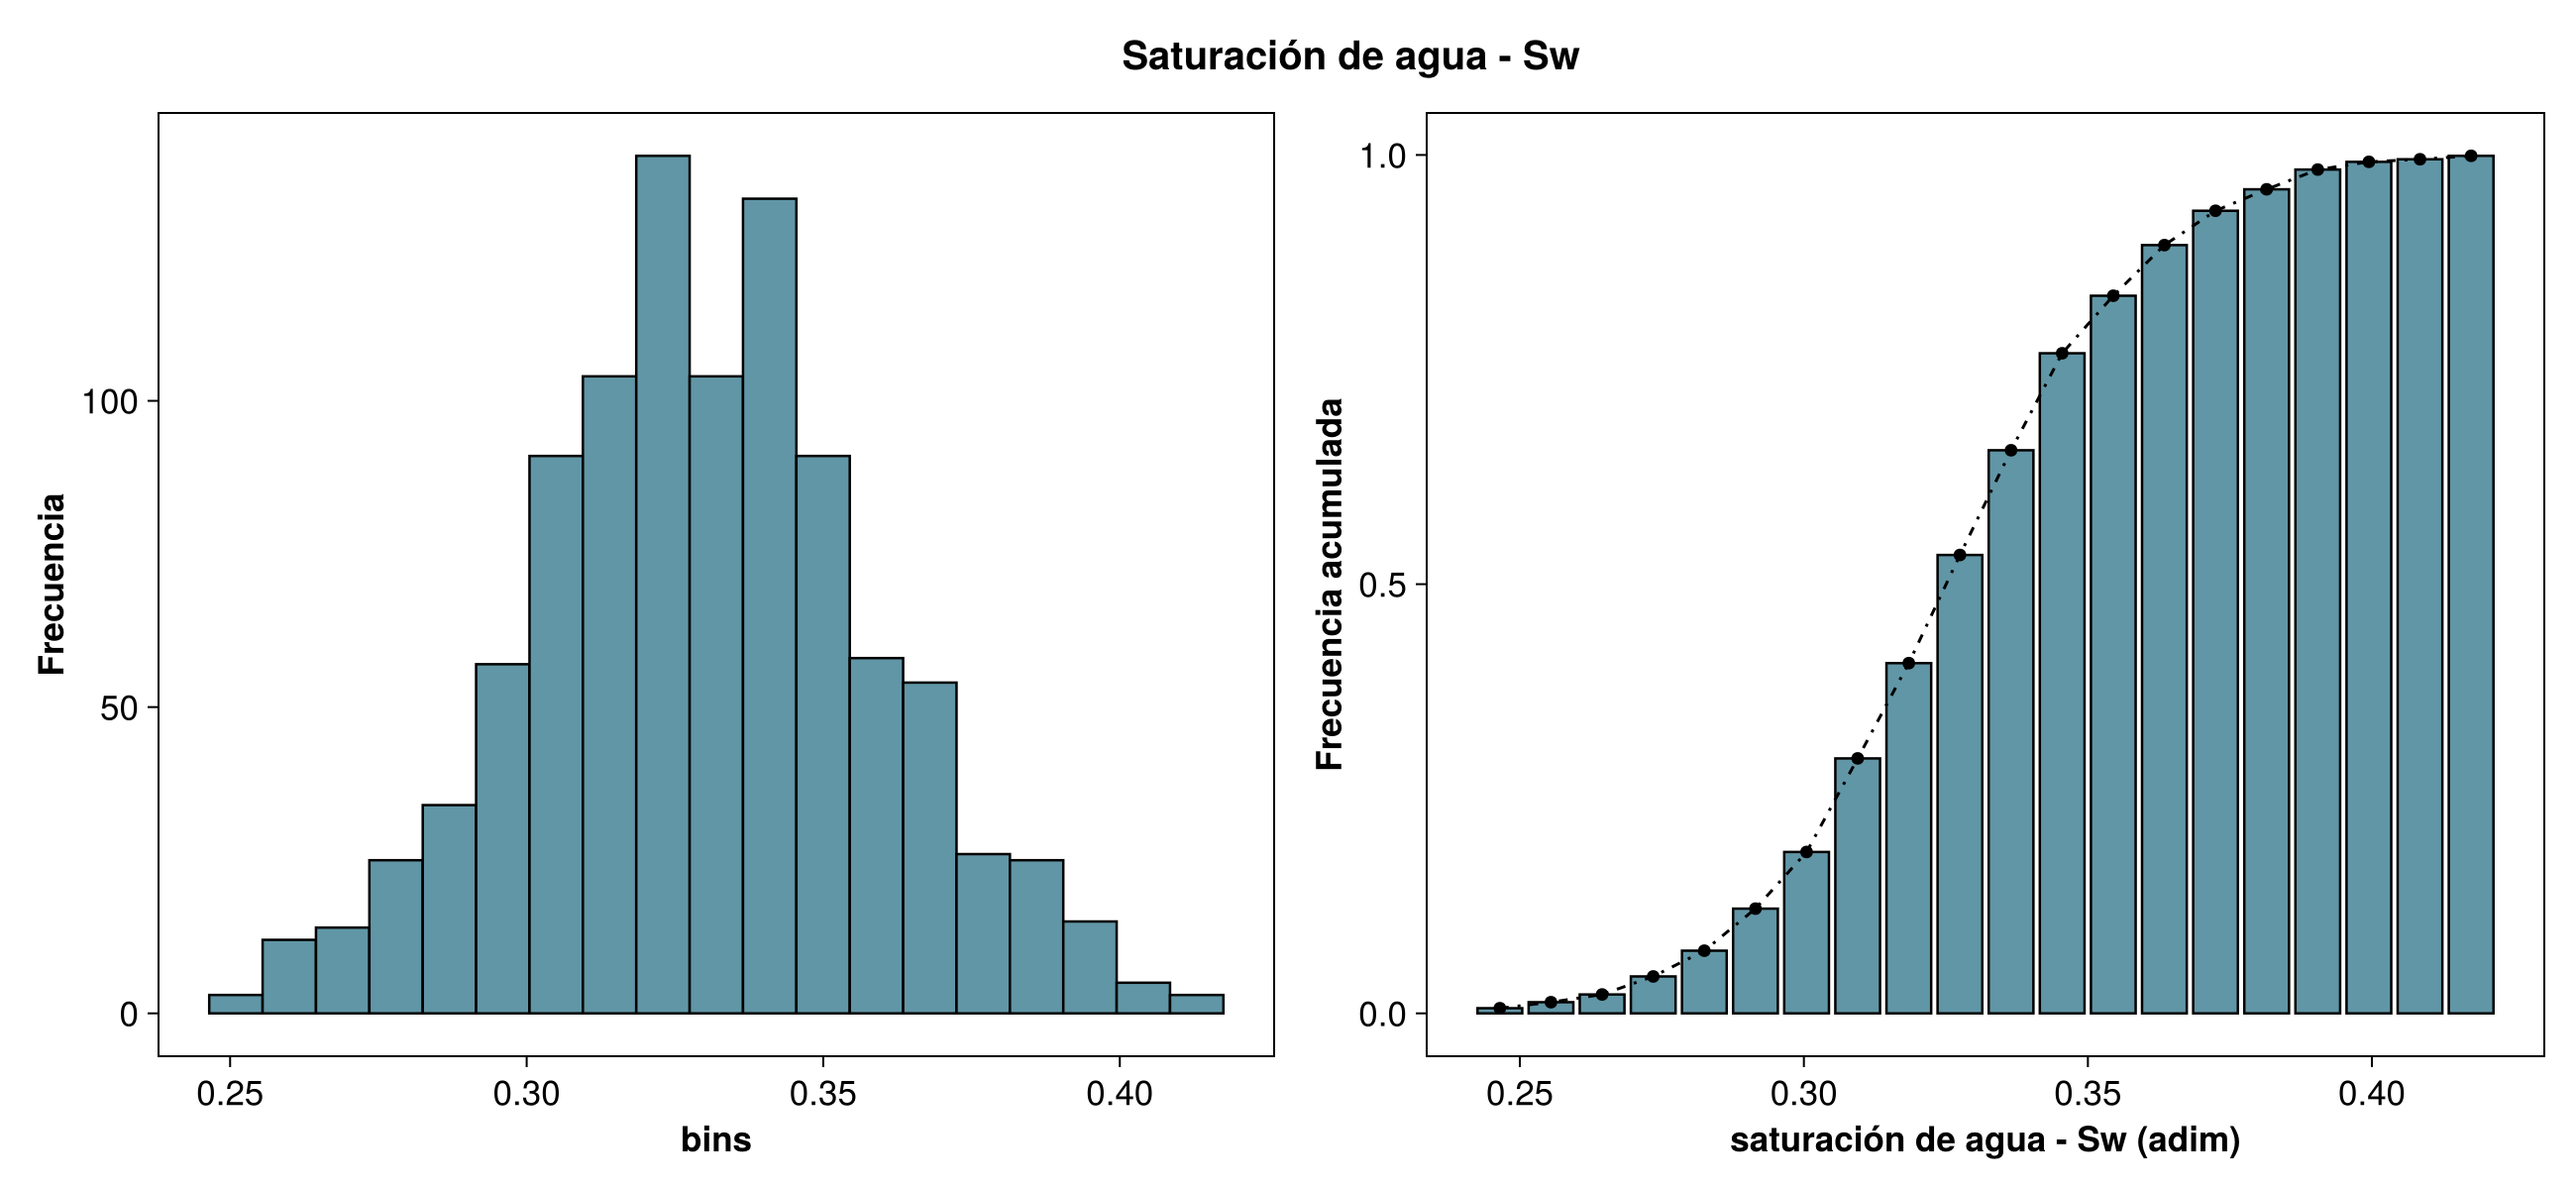

In [39]:
plot_freq(sw, bin_mid_sw, 20, "saturación de agua - Sw", "adim", "#6196A6")

## Reservoir thickness - h

In [40]:
h, bin_mid_h, df_h = gen_normal_data(15, 1.5, 1000, 20);

In [41]:
first(df_h, 10)

Row,n_bins,bin_edges_1,bin_mid,bin_edges_2,frec,frec_acum
,Int64,Float64,Float64,Float64,Int64,Float64
1,1,10.343,10.597,10.851,3,0.003
2,2,10.851,11.105,11.359,3,0.006
3,3,11.359,11.613,11.867,12,0.018
4,4,11.867,12.121,12.375,18,0.036
5,5,12.375,12.629,12.883,42,0.078
6,6,12.883,13.137,13.392,49,0.127
7,7,13.392,13.646,13.9,87,0.214
8,8,13.9,14.154,14.408,127,0.341
9,9,14.408,14.662,14.916,123,0.464


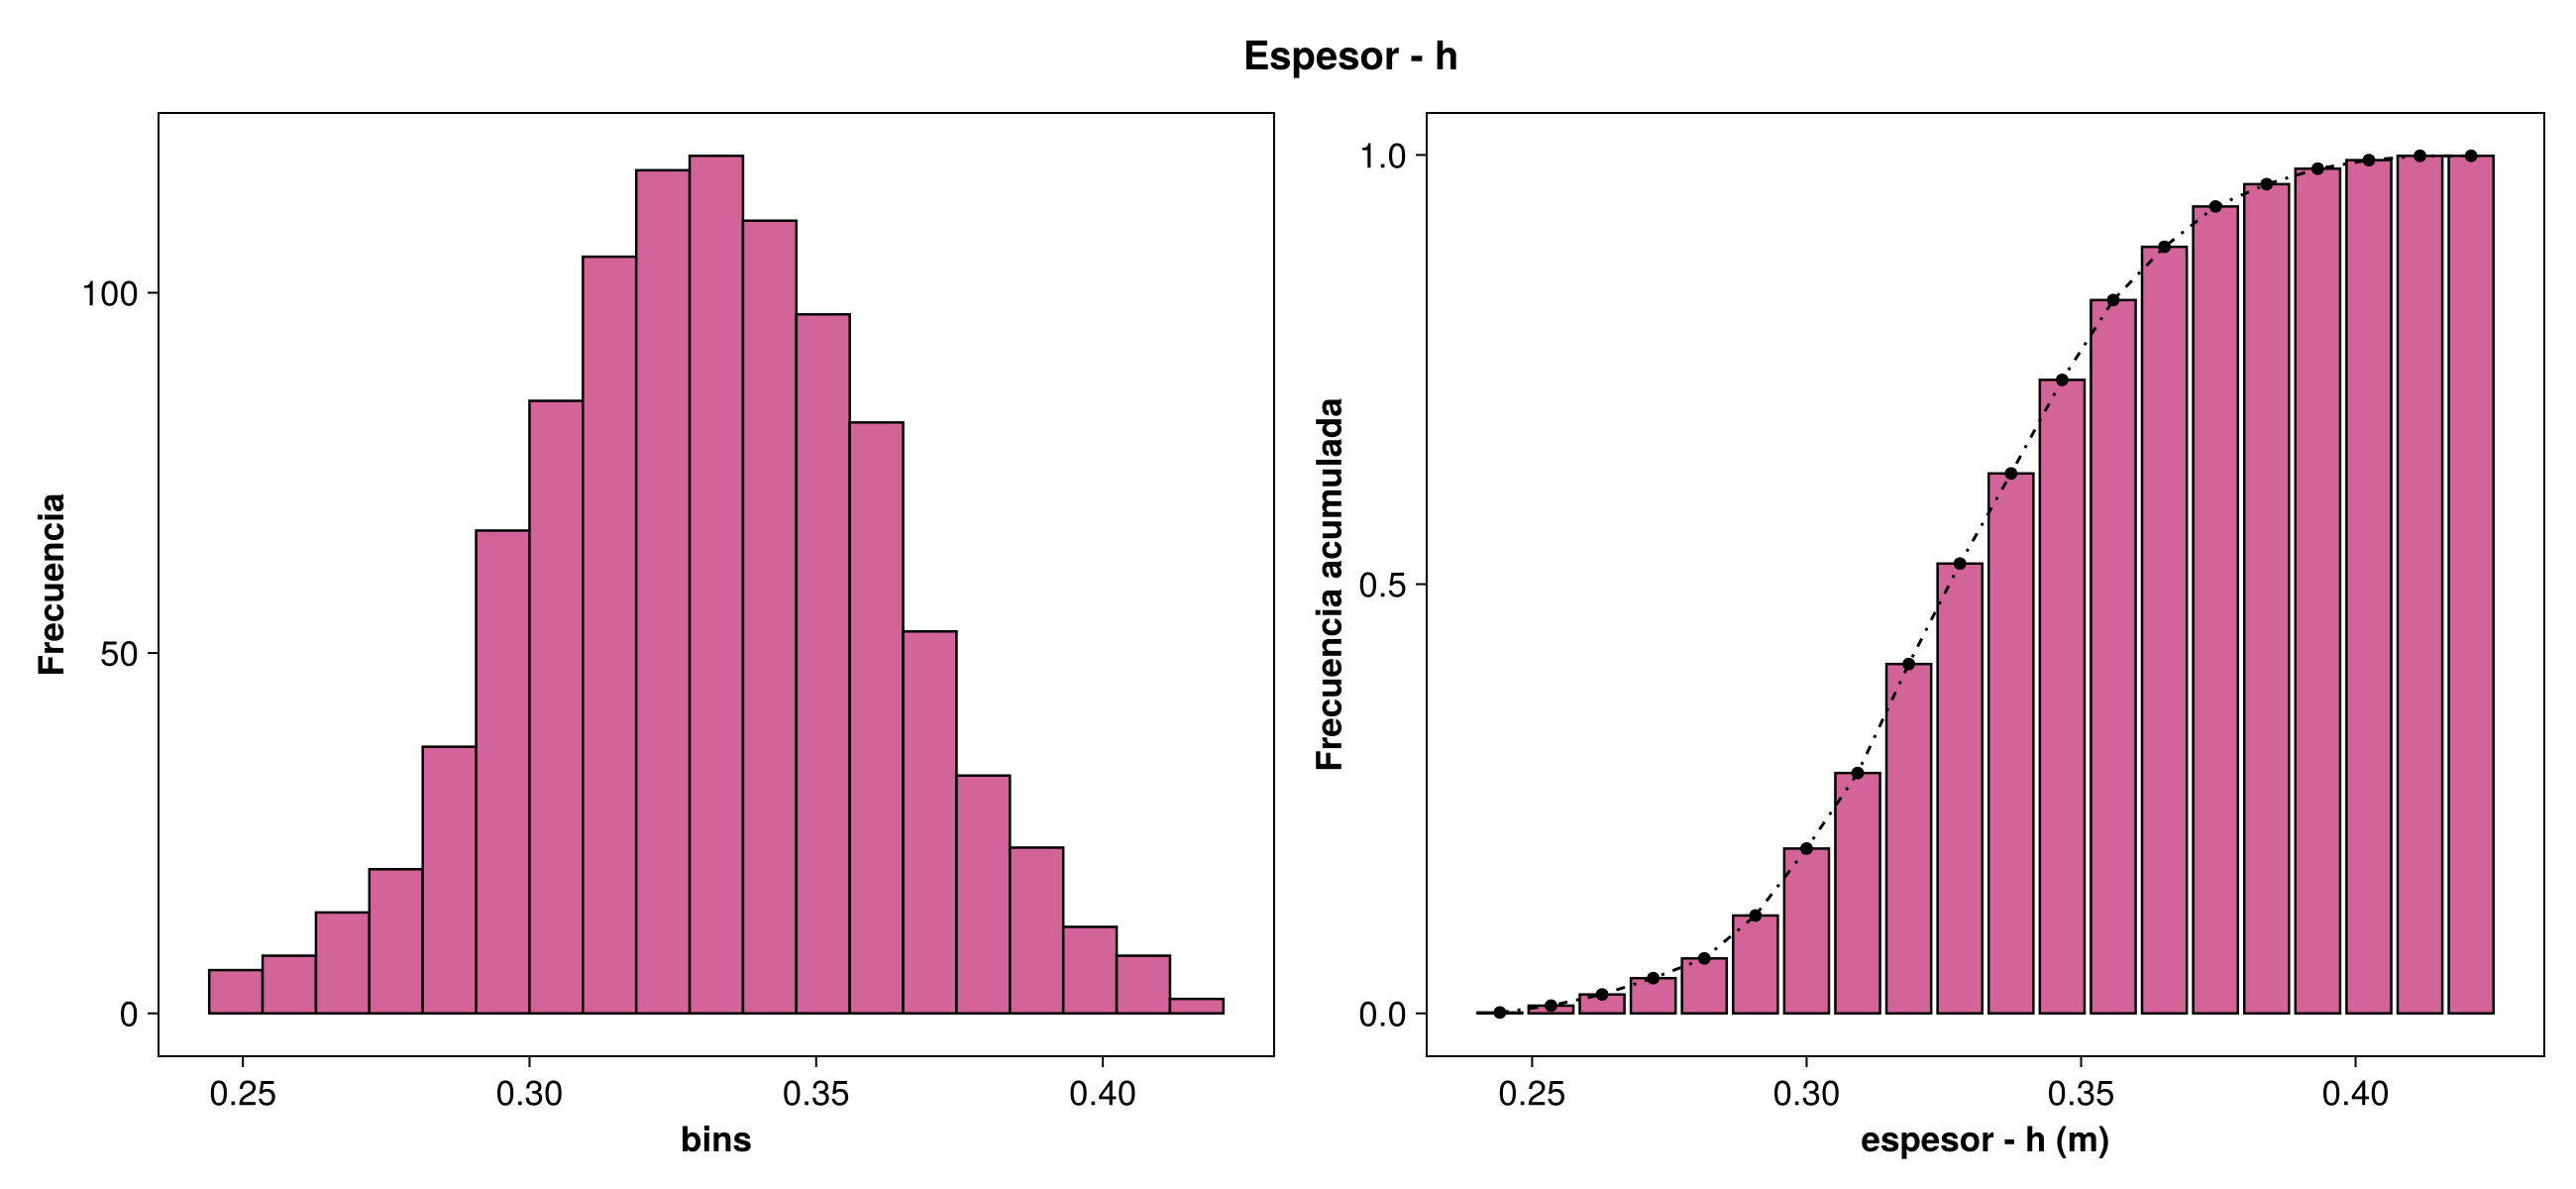

In [12]:
plot_freq(sw, bin_mid_sw, 20, "espesor - h", "m", "#D2649A")

## Área y fluidos

In [13]:
#= Definición del área del yacimiento. El área puede ser una variable dentro
del proceso de simulación. Si la delimitación del yacimiento es adecuada se
puede tomar como un valor fijo =#

In [46]:
A = 1.72 # Área km2

1.72

In [15]:
#= Área y factor de volumen del gas
   Presión de yacimiento 7000 psi
   Temperatura de yacimiento 128°C =#

In [47]:
Bg = 0.003 # m3/sm3

0.003

## Simulación de Montecarlo

Una vez se tiene la distribución de probabilidad de los parámetros de yacimiento involucrados en el cálculo del volumen original de hidrocarburos, se realiza un proceso iterativo con valores aleatorios de probabilidad para cada una de las variables de interés, los valores aleatorios son utilizados en la función objetivo para tener una estimación de probabilística del volumen de hidrocarburos y definir los percentiles de probabilidad del volumen de hidrocarburos (P10, P50, P90).

## Original Gas-in Place

In [53]:
# Función para la generación de los datos con una distribución normal
function gen_ogip_data(poro::Vector{Float64}, sw::Vector{Float64}, h::Vector{Float64}, values::Int64, A::Float64, Bg::Float64, bns::Int64)
    # Random.seed!(2)
    values = values
    ogip = Vector{Float64}(undef, 0)
    numbers = Vector{Int64}(undef, 0)

    # Porosity - phi
    bin_mid_poro = Vector{Float64}(undef, 0)
    bins_poro = collect(LinRange(minimum(poro), maximum(poro), bns+1))
    bw_poro = (bins_poro[2] - bins_poro[1])/2
    hist_poro = fit(Histogram, poro, bins_poro)
    frec_poro = collect(hist_poro.weights)
    frec_acum_poro = cumsum(frec_poro)/values

    for j in 1:bns
        push!(bin_mid_poro, bins_poro[j] + bw_poro)
    end

    # Water_saturation - Sw
    bin_mid_sw = Vector{Float64}(undef, 0)
    bins_sw = collect(LinRange(minimum(sw), maximum(sw), bns+1))
    bw_sw = (bins_sw[2] - bins_sw[1])/2
    hist_sw = fit(Histogram, sw, bins_sw)
    frec_sw = collect(hist_sw.weights)
    frec_acum_sw = cumsum(frec_sw)/values

    for j in 1:bns
        push!(bin_mid_sw, bins_sw[j] + bw_sw)
    end

    # Reservoir thicknes - h
    bin_mid_h = Vector{Float64}(undef, 0)

    bins_h = collect(LinRange(minimum(h), maximum(h), bns+1))
    bw_h = (bins_h[2] - bins_h[1])/2
    hist_h = fit(Histogram, h, bins_h)
    frec_h = collect(hist_h.weights)
    frec_acum_h = cumsum(frec_h)/values

    for j in 1:bns
        push!(bin_mid_h, bins_h[j] + bw_h)
    end

    # Interpolation functions
    itp_poro = LinearInterpolation(bin_mid_poro, frec_acum_poro)
    itp_sw = LinearInterpolation(bin_mid_sw, frec_acum_sw)
    itp_h = LinearInterpolation(bin_mid_h, frec_acum_h)

    # Original Gas in Place
    for value in 1:values
        poro = rand(Uniform(minimum(frec_acum_poro), maximum(frec_acum_poro)))
        sw = rand(Uniform(minimum(frec_acum_sw), maximum(frec_acum_sw)))
        h = rand(Uniform(minimum(frec_acum_h), maximum(frec_acum_h)))
        poro_val = itp_poro(poro)
        sw_val = itp_sw(sw)
        h_val = itp_h(h)

        ogip_val = A * 1000^2 * h_val * poro_val * (1 - (sw_val)) * 3.28^3 / (Bg*1e9)
        push!(ogip, ogip_val)
    end

    bin_edges_1_ogip = Vector{Float64}(undef, 0)
    bin_mid_ogip = Vector{Float64}(undef, 0)
    bin_edges_2_ogip = Vector{Float64}(undef, 0)

    bins_ogip = collect(LinRange(minimum(ogip), maximum(ogip), bns+1))
    bw_ogip = (bins_ogip[2] - bins_ogip[1])/2
    hist_ogip = fit(Histogram, ogip, bins_ogip)
    frec_ogip = collect(hist_ogip.weights)
    frec_acum_ogip = cumsum(frec_ogip)/values

    for (i, j) in enumerate(1:bns)
        push!(bin_edges_1_ogip, bins_ogip[j])
        push!(bin_mid_ogip, bins_ogip[j] + bw_ogip)
        push!(bin_edges_2_ogip, bins_ogip[j+1])
        push!(numbers, i)
    end

    df_ogip = DataFrame(n_bins=numbers, bin_edges_1=bin_edges_1_ogip, bin_mid=bin_mid_ogip, 
                        bin_edges_2=bin_edges_2_ogip, frec=frec_ogip, frec_acum=frec_acum_ogip)

    df_ogip[!, [2, 3, 4, 6]] = round.(df_ogip[!, [2, 3, 4, 6]], digits=3)

    return ogip, bin_mid_ogip, df_ogip
end

gen_ogip_data (generic function with 1 method)

In [54]:
ogip, bin_mid_ogip, df_ogip = gen_ogip_data(poro, sw, h, 1000, A, Bg, 20) ;

In [55]:
first(df_ogip, 10)

Row,n_bins,bin_edges_1,bin_mid,bin_edges_2,frec,frec_acum
,Int64,Float64,Float64,Float64,Int64,Float64
1,1,18.237,19.543,20.85,3,0.003
2,2,20.85,22.156,23.462,10,0.013
3,3,23.462,24.768,26.075,6,0.019
4,4,26.075,27.381,28.687,40,0.059
5,5,28.687,29.994,31.3,60,0.119
6,6,31.3,32.606,33.912,112,0.231
7,7,33.912,35.219,36.525,134,0.365
8,8,36.525,37.831,39.137,124,0.489
9,9,39.137,40.444,41.75,143,0.632


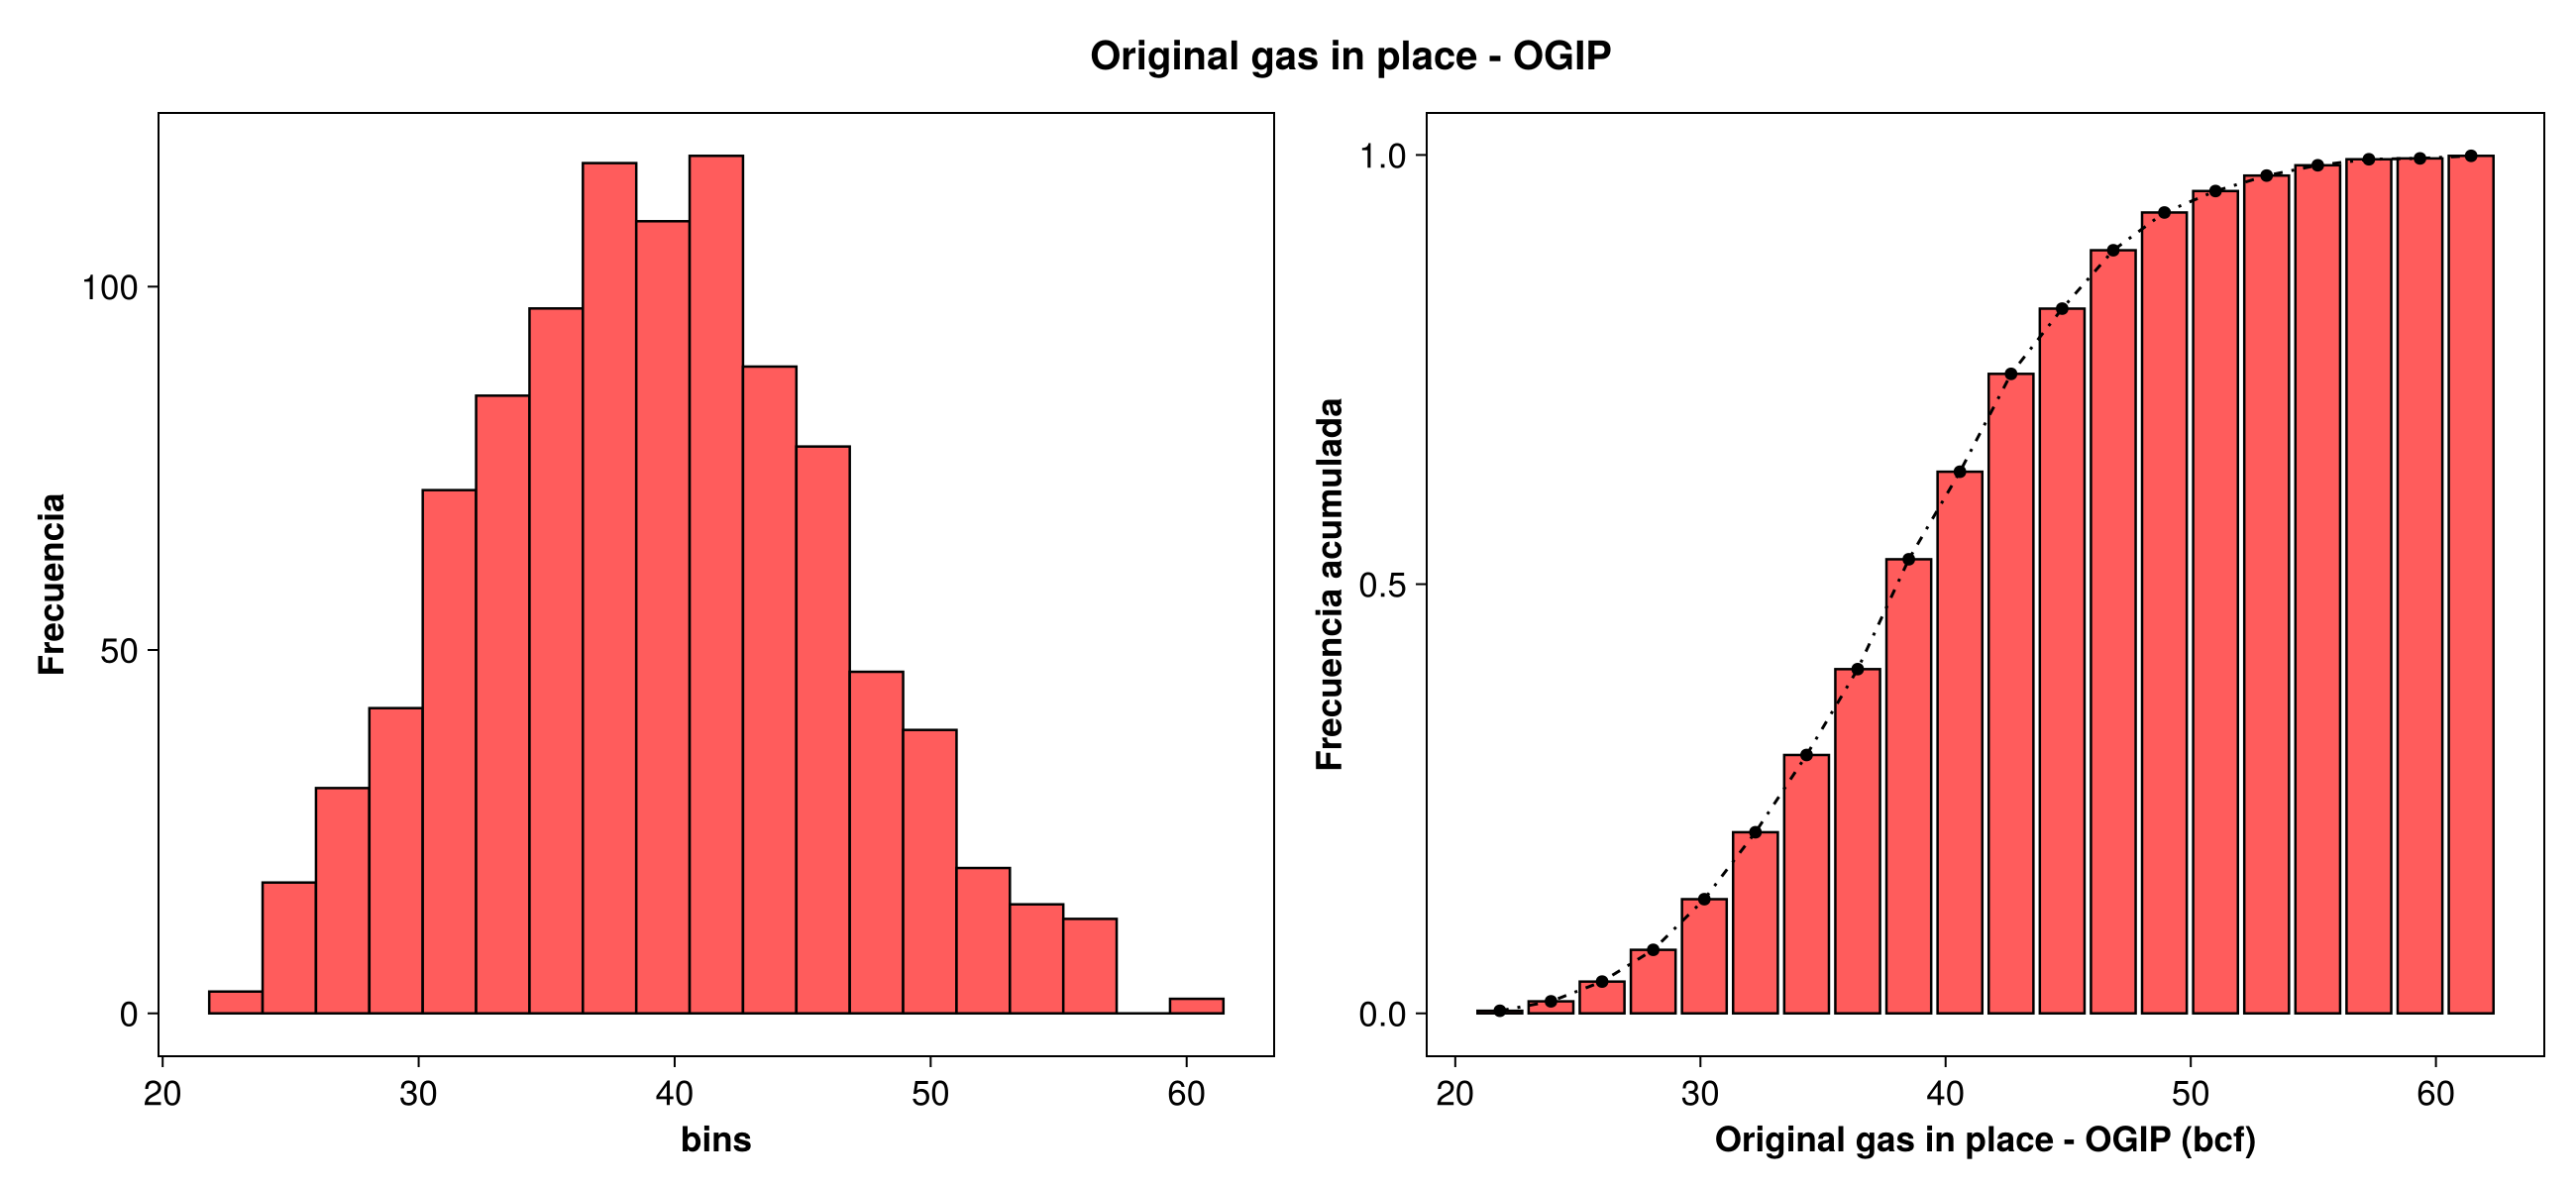

In [20]:
plot_freq(ogip, bin_mid_ogip, 20, "Original gas in place - OGIP", "bcf", "#FF5C5C")

### Percentiles

In [21]:
# P10
P10 = percentile(ogip, 10)

# P50
P50 = percentile(ogip, 50)

# P90
P90 = percentile(ogip, 90)

println(P10)
println(P50)
println(P90)

30.345016354879807
39.002744443002044
48.379622973105235
